Лабораторная работа 3. Яровенко Максим, ИУ5Ц-102Б. Вариант 22

# **Задание 1**

В процессе эксплуатации ЭВМ осуществляются ее разовые проверки, в результате которых она может оказаться в следующих состояниях:
- $S_1$ - ЭВМ полностью исправна;
- $S_2$ - ЭВМ имеет незначителльные неисправности в программном обеспечении, при которых она может решать задачи;
- $S_3$ - ЭВМ имеет существенные неисправности и может решать ограниченный класс задач;
- $S_4$ - ЭВМ полностью вышла из строя.

В начальный момент времени ЭВМ полностью исправна (состояние $S_1$). Проверка ЭВМ производится в фиксированные моменты времени $t_k$. Процесс, протекающий в системе, может рассматриваться как однородная марковская цепь с $k$ шагами ($1, 2,\ldots, k$ проверки). Матрица переходных вероятностей имеет вид:
\begin{equation}
P = \begin{pmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ 0 & p_{22} & p_{23} & p_{24} \\0 & 0 & p_{33} & p_{34}\\ 0 & 0 & 0 & p_{44}\end{pmatrix}
\end{equation}

In [69]:
Variant<-22
set.seed(Variant)
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

,,,,
,<dbl>,<dbl>,<dbl>,<dbl>
p1,0.1676249,0.3508027,0.1838370,0.2977353
p2,0.0000000,0.3481401,0.2960878,0.3557721
p3,0.0000000,0.0000000,0.5282422,0.4717578
p4,0.0000000,0.0000000,0.0000000,1.0000000


[1] "k= 9"


Схема

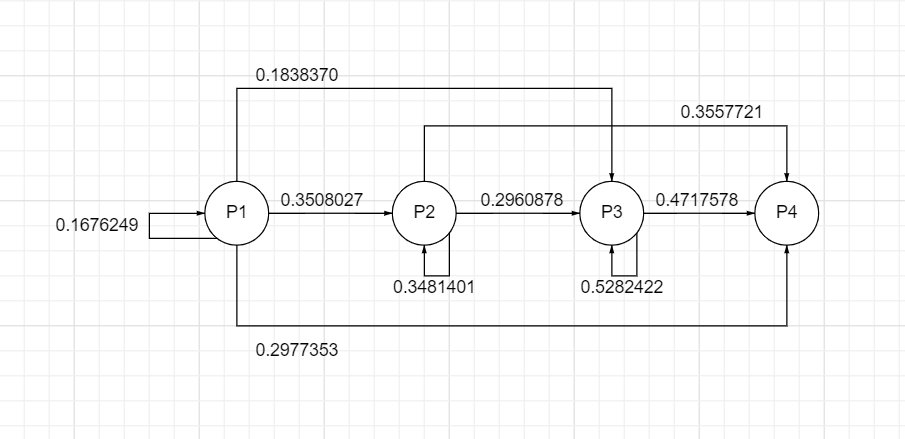

Библиотеки

In [ ]:
install.packages("lpSolve")
install.packages("matrixcalc")
library(matrixcalc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Исходные данные

In [ ]:
statesCount<-4
ks<-c(k-2, k-1, k)

M<-matrix(c(p1,
            p2,
            p3,
            p4), ncol=4, nrow=4, byrow=TRUE)
ks; M

[1] 7 8 9

0.1676249,0.3508027,0.1838370,0.2977353
0.0000000,0.3481401,0.2960878,0.3557721
0.0000000,0.0000000,0.5282422,0.4717578
0.0000000,0.0000000,0.0000000,1.0000000


**Экспериментальное решение**

---



Функция для генерация состояния

In [ ]:
# StateRand - генерирует номер нового состояния
# s - состояние, в котором находимся
StateRand<-function(s, M) {
  r = runif(1)
  sum <- 0
  i <-0
  while ((i < statesCount) & (sum < r)) {
    i <- i + 1
    sum <- sum + M[s,i]
  }
  return(i)
}

Функция с экспериментом для определенного к

In [ ]:
Exp1Func<-function(k, M) {
  N<-100000
  exp <- vector(mode="integer", length = 4)
  for (i in 1:N)
  {
    state = 1
    for (i in 1:k) {
      state = StateRand(state, M)
    }
    exp[state] = exp[state] + 1
  }

  resExp <- vector(mode="integer", length = 4)
  for (i in 1:length(exp)) {
    resExp[i] = exp[i] / N
  }

  return (resExp)
}

**Теоретическое решение**

---



Изначально находимся в состоянии s1, соответственно вектор состояний такой: (1,0,0,0)

Теоретической формулой является перемножение начального вектора состояний и матрицы состояний в степени к

In [ ]:
Teor1Func<-function(k, M) {
  # изначально в состоянии S1
  M0<-matrix(c(1, 0, 0, 0), ncol=4, nrow=1, byrow=TRUE)
  # M0 * M^k
  resTeor = M0 %*% matrix.power(M,k)
  return (resTeor)
}

**Тест**

---



In [ ]:
ksNames = c("- 2", "- 1", "")
results1 = data.frame(rows.names=c("s1","s2","s3","s4"))
for (i in 1:length(ks)) {
  res1Exp = Exp1Func(ks[i], M)
  res1Teor = Teor1Func(ks[i], M)

  results1[paste('Численно, для k', ksNames[i], '=', ks[i])] = c(res1Exp)
  results1[paste('Теоретически для k', ksNames[i], '=', ks[i])] = c(res1Teor)
}

View(results1)

rows.names,"Численно, для k - 2 = 7",Теоретически для k - 2 = 7,"Численно, для k - 1 = 8",Теоретически для k - 1 = 8,"Численно, для k = 9",Теоретически для k = 9
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s1,0.00002,3.718523e-06,0.00000,6.233172e-07,0.00001,1.044835e-07
s2,0.00148,1.197331e-03,0.00055,4.181432e-04,0.00020,1.457911e-04
s3,0.02207,2.222938e-02,0.01208,1.209770e-02,0.00640,6.514435e-03
s4,0.97643,9.765696e-01,0.98737,9.874835e-01,0.99339,9.933397e-01


# **Задание 2**


Вычислительный центр фирмы состоит из одного главного сервера коллективного пользования. Число работающих в в центре программистов в любой момент времени равно $k$. Каждый программист готовит свою программу и через терминал передает ее на сервер для выполнения, куда она сразу попадает. Время подготовки программ имеет экспоненциальное распределение со средним значением $t_{1}$ мин. Время выполнения программы имеет экспоненциальное распределение со средним значением $t_{2}$ мин. Найти (теоретически и экспериментально):
 - вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
 - среднее время до получения пользователем результатов реализации;
 - среднее количество программ, ожидающих выполнения на сервере.

In [52]:
Variant<-22
set.seed(Variant)
k<-sample(c(10:25),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k,t1,t2
<int>,<int>,<int>
15,14,5


Если lambda >= mu, очередь растет до бесконечности (см. теоретическое решение)
увеличим, например, время подготовки программ

In [53]:
t1 <- 100

**Экспериментальное решение**

---

Функция для эксперимента

In [54]:
DelFirst<-function(array) {
  newArr <- c()
  if (length(array) > 1) {
    newArr = array[2:length(array)]
  } else {
    newArr = c()
  }
  return (newArr)
}

Переменные для эксперимента

In [55]:
N<-50000

timesPrepare<-rexp(N,1/t1)
timesExecute<-rexp(N,1/t2)
timesPrepare
timesExecute

# кол-во программ, выполнимых сразу же, как только поступят в очередь
executeAtOnce<-0
executesAtOnce<-c()
# время в очереди
timesWait<-c()

# время, оставшееся для завершения подготовки программ для k программистов
timesProgrammers<-sort(timesPrepare[1:k])
timesProgrammers

prepareNumber<-k+1
executeNumber<-1

# время, оставшееся для завершения выполнения программ в очереди
tExecutes<-c()

[1] 4.130772e+00 6.864621e+01 4.466291e+01 2.303361e+01 4.783426e+01
    [6] 1.362107e+02 1.183647e+02 3.283288e+01 7.501721e+01 1.785596e+02
   [11] 2.362513e+01 1.179369e+02 1.636072e+02 5.929391e+01 5.425354e+01
   [16] 3.233666e+01 1.509830e+02 7.263412e+01 6.110716e+01 1.704985e+02
   [21] 2.476252e+00 2.968490e+02 7.013836e+01 1.488149e+02 7.391141e+01
   [26] 4.218879e+01 3.822216e+01 1.996064e+01 1.211068e+02 1.854916e+02
   [31] 2.822607e+01 5.902828e+01 7.342833e+01 1.044512e+02 2.716814e+02
   [36] 3.240126e+01 4.781653e+01 2.052143e+01 1.617886e+02 3.375225e+01
   [41] 2.062930e+02 5.979623e+01 4.531559e+00 2.450783e+02 6.579952e+01
   [46] 1.055505e+02 1.425664e+02 2.755006e+02 1.374281e+02 7.718163e+01
   [51] 1.331669e+02 1.502496e+02 5.459893e+01 5.283396e+01 3.126158e+00
   [56] 4.087692e+00 2.316198e+02 2.340422e+01 1.662943e+02 1.545908e+02
   [61] 4.018277e+01 2.277126e+01 2.167500e+02 1.016830e+02 3.410499e+01
   [66] 1.413792e+02 8.001340e+01 1.374295e+01 9.566447e+01 1.212127e+02
   [71] 7.980070e+01 1.846120e+02 1.610951e+02 1.003412e+02 6.303965e+01
   [76] 1.891327e+02 2.016254e+02 3.904557e+01 5.563600e+01 6.455595e+00
   [81] 7.131697e+01 5.200017e+01 9.289122e+01 3.361521e+01 1.373601e+02
   [86] 1.733538e+02 1.023817e+02 2.756215e+02 1.081592e+02 1.705769e+02
   [91] 2.710881e+01 2.170837e+01 2.029144e+02 4.067955e+01 2.220612e+01
   [96] 2.291942e+01 1.232155e+02 7.487413e+01 1.521649e+02 4.866767e+01
  [101] 4.482102e+01 2.090349e+02 7.449391e+00 1.048762e+01 2.711134e+02
  [106] 2.540335e+01 2.087243e+02 7.551185e+01 9.972084e+01 1.366716e+02
  [111] 8.366888e+01 9.492462e+01 6.323395e+01 1.074503e+02 7.888337e+01
  [116] 1.416385e+02 8.401511e+01 2.345741e+02 4.153314e+01 4.057990e+01
  [121] 5.840390e+01 1.074849e+02 1.386984e+02 1.245427e+02 5.917213e+00
  [126] 9.946388e+00 1.433991e+02 1.911291e+02 3.174253e+02 2.341371e+02
  [131] 3.264804e+02 3.977597e-01 2.567230e+02 1.390724e+02 2.375638e+01
  [136] 2.105872e+01 1.782861e+02 3.647967e+01 3.229476e+00 1.750330e+01
  [141] 1.048649e+01 1.150709e+02 1.611251e+01 1.019063e+02 2.116349e+01
  [146] 4.114833e+02 8.577975e+01 1.994623e+02 1.818715e+02 1.440718e+02
  [151] 7.515544e+00 1.833306e+01 2.266986e+02 9.593096e+01 1.387702e+02
  [156] 8.872227e+01 3.551560e+02 4.392556e+02 1.394549e+01 1.538187e+02
  [161] 5.646512e+01 5.147108e+01 2.354267e+02 4.313102e+01 5.210927e+01
  [166] 4.116121e+01 1.204126e+01 9.909140e+01 1.472177e+01 1.362075e+02
  [171] 2.619185e+02 3.078582e+02 1.055426e+02 1.968416e+02 7.266762e+01
  [176] 1.050470e+02 8.173361e+01 2.222157e+02 1.630983e+02 4.703416e+01
  [181] 4.158389e+01 2.518335e+02 1.089615e+02 1.178667e+02 6.424874e+00
  [186] 7.361409e+00 1.705878e+01 1.051971e+02 8.726487e+01 3.391418e+02
  [191] 2.973921e+01 2.327982e+02 1.259804e+02 9.302685e+00 2.001885e+02
  [196] 4.745061e+01 5.788930e+01 9.155950e+01 8.752872e+01 3.641103e+02
  [201] 1.430151e+02 2.285852e+01 3.794110e+01 1.454075e+02 1.632416e+02
  [206] 3.837672e+00 1.963989e+01 2.818470e+01 1.175474e+02 3.362748e+01
  [211] 1.025838e+02 6.843303e+01 8.885085e+00 7.887866e+01 3.861932e+01
  [216] 3.031471e+00 1.382954e+02 5.954880e+01 9.084616e+01 7.490094e+01
  [221] 8.757119e+01 2.946065e+02 7.038521e+01 9.836434e+01 1.250389e+01
  [226] 1.196909e+02 4.643340e+01 2.819940e+02 2.570537e+01 1.054475e+02
  [231] 9.894075e+01 2.434388e+02 7.959163e+01 1.893176e+01 1.452956e+02
  [236] 1.461260e+00 3.147381e+01 3.834402e+01 1.453279e+00 4.185804e+02
  [241] 8.586306e+01 3.457775e+02 1.444128e+02 2.402289e+01 1.424562e+02
  [246] 6.012969e+01 9.556733e+01 5.219632e+00 7.337970e+01 1.427312e+02
  [251] 3.300429e+00 1.871823e+01 8.873356e+01 7.002454e+01 1.785882e+02
  [256] 8.292778e+01 1.467148e+02 1.367885e+01 5.122873e+01 3.865868e+02
  [261] 2.134345e+02 7.619720e+00 3.168113e+01 3.014095e+01 1.661989e+02
  [266] 3.706891e+01 1.969841e+02 2.280789e+00 3.087059e+01 7.732785e+01
  [271] 1.806911e+02 5.579095e+01 3.589215e+01 1.199134e+02 8.

[1] 5.570275e+00 1.056333e+01 3.316406e+00 1.137823e+01 1.682470e+01
    [6] 3.843881e+00 9.279357e+00 2.443492e+00 4.490264e+00 5.542005e+00
   [11] 1.385321e+00 3.161046e+00 1.504246e+00 9.011350e+00 3.901725e-01
   [16] 1.339723e+01 1.682271e+00 7.088822e+00 1.256781e+00 2.640846e+00
   [21] 1.556417e+00 4.901371e+00 1.551721e+00 4.491601e+00 1.285334e+01
   [26] 1.939282e+01 1.113639e+00 4.293480e+00 6.752207e+00 5.704010e+00
   [31] 6.317524e+00 1.685661e+00 2.769109e+00 2.379735e-01 1.560632e+00
   [36] 8.252893e+00 7.937496e+00 3.963923e+00 2.742251e+00 3.718358e+00
   [41] 2.912316e+00 1.539733e-01 2.406938e+00 5.114620e-01 7.066320e+00
   [46] 1.231135e+00 3.028453e+00 7.422559e-01 1.309353e+01 1.217428e+00
   [51] 6.504888e+00 3.700209e-01 4.515534e+00 8.769043e+00 2.304955e+00
   [56] 7.372253e+00 4.368316e+00 8.629012e+00 2.374728e+00 2.810305e+00
   [61] 1.806510e+00 8.927664e+00 1.122773e+01 2.362663e+00 9.863660e-01
   [66] 2.669119e+00 1.765956e+00 1.984451e+00 1.176198e-01 1.390822e+01
   [71] 1.397027e+00 5.618320e+00 3.612492e-01 5.001055e+00 2.662984e+00
   [76] 1.576243e+01 1.610423e+00 3.089784e+00 3.911690e+00 1.199187e-01
   [81] 1.580723e+00 1.184064e+01 1.099442e+00 5.239522e+00 1.787113e+00
   [86] 1.479814e+00 4.936941e-01 1.015419e+00 9.239311e+00 5.527131e+00
   [91] 3.059856e+00 1.242027e+00 1.106927e+01 2.519840e+00 1.788911e+00
   [96] 8.515574e+00 5.613599e+00 8.659639e+00 5.149564e-01 6.819594e+00
  [101] 4.465194e+00 1.850820e+00 3.631846e+00 2.959856e+00 1.414552e+00
  [106] 3.865046e-01 9.174322e-01 4.088256e+00 2.229172e+00 7.929521e+00
  [111] 2.378082e+00 1.283442e+01 3.689244e+00 2.819898e+00 3.605270e+00
  [116] 5.710091e+00 1.084625e+01 6.026006e+00 4.732618e-01 3.265648e+00
  [121] 1.150592e+01 2.184994e+01 1.283121e+01 3.623852e-01 4.685335e+00
  [126] 2.487478e+00 9.186848e+00 4.352760e+00 3.871515e+00 7.476561e+00
  [131] 1.065545e+01 3.899545e+00 4.448080e+00 3.248529e+00 6.561126e+00
  [136] 8.351055e-01 5.581800e+00 1.235287e-01 4.884278e+00 3.101619e+00
  [141] 1.959464e+00 7.006039e+00 1.076007e+01 4.491496e+00 5.489480e+00
  [146] 7.848698e+00 2.638622e+00 3.985270e+00 4.382901e+00 1.592122e+00
  [151] 1.814373e+01 2.411376e+00 9.433438e-01 3.478504e+00 3.261726e+00
  [156] 1.261055e+00 1.488897e+01 3.835862e+00 6.490079e+00 4.467386e+00
  [161] 2.684131e+01 1.656005e+01 6.432964e+00 6.179870e+00 4.623591e+00
  [166] 1.579190e+00 1.007959e+01 1.768065e+00 3.177585e-01 1.057748e+01
  [171] 1.685914e+00 4.007845e+00 5.084446e+00 9.799905e-01 5.616226e+00
  [176] 1.002531e+00 9.180439e-01 5.265024e+00 2.390458e+00 7.588329e+00
  [181] 3.382694e+00 1.893027e+00 2.248773e+01 1.474288e+00 6.110634e-01
  [186] 8.406976e-01 3.943408e+00 2.431373e-01 5.789407e+00 4.242916e+00
  [191] 6.931670e-01 1.512128e+00 3.289140e+00 3.454795e+00 2.840579e+00
  [196] 3.075535e+01 4.088653e+00 5.651185e+00 2.752109e+00 4.779535e+00
  [201] 7.175708e-02 3.199276e+00 1.695320e+00 7.397325e+00 6.145152e+00
  [206] 5.659560e+00 1.729691e+01 5.602568e-01 5.413755e-01 3.915563e+00
  [211] 1.648391e+01 3.265607e+00 2.743546e+00 6.568918e+00 5.183923e+00
  [216] 1.842973e+01 1.265929e+00 3.013163e+00 1.289718e+00 1.117738e+01
  [221] 1.365358e+01 1.193149e+00 8.698271e+00 2.157824e+01 3.448115e-01
  [226] 3.550178e+00 1.361580e-01 1.049390e+00 3.918432e+00 2.001657e+00
  [231] 1.406114e+01 1.175295e+00 1.704060e+01 4.566711e+00 8.059527e-01
  [236] 8.340856e-01 3.256619e+00 1.663135e+01 2.057630e+00 8.330779e-01
  [241] 5.613654e-01 1.068355e+01 3.763269e+00 7.973045e-01 8.304018e+00
  [246] 3.518429e+00 8.396384e-01 3.083021e+00 2.279844e+00 1.513804e+00
  [251] 2.417079e+00 2.004853e+00 4.968162e+00 3.017664e-01 1.067047e+00
  [256] 4.483292e+00 2.236629e-01 9.087716e+00 1.243912e+01 2.151585e+00
  [261] 8.478687e+00 1.415995e+00 1.521288e+01 4.192567e+00 3.971469e+00
  [266] 1.109527e+01 6.484949e+00 3.917254e-01 1.674901e+00 1.504402e+01
  [271] 1.218881e+01 5.249361e+00 1.139922e+00 3.195888e+00 2.

[1]   4.130772  23.033611  23.625128  32.832885  44.662910  47.834264
 [7]  54.253543  59.293906  68.646206  75.017212 117.936949 118.364714
[13] 136.210712 163.607192 178.559566

Сам цикл эксперимента

In [56]:
msg<-0
for (i in 1:N) {
  # время до поступления очередной программы и поставновки и её в очередь
  tPrepare<-0

  if (msg) {
    print(i)
    print("Текущее время подготовки программ:")
    print(timesProgrammers)
  }

  # подготавливается 1 программа, оставшееся время подготовки которой меньше всего
  if (length(timesProgrammers) != 0) {
    tPrepare = timesProgrammers[1]
  }

  if (msg) {
    print("ВРЕМЯ ПОДГОТОВКИ:")
    print(tPrepare)
  }

  # у остальных программ время подготовки уменьшается на время подготовки этой программы
  if (length(timesProgrammers) != 0) {
    timesProgrammers[1] = 0 # можно убрать
    if (length(timesProgrammers) > 1) {
      for (j in 2:length(timesProgrammers)) {
        timesProgrammers[j] = timesProgrammers[j] - tPrepare
      }
    }
  }

  if (msg) {
    print("Время подготовки для остальных программ:")
    print(timesProgrammers)
  }

  # поступает следующая программа, если программы еще не закончились
  if (prepareNumber <= N) {
    timesProgrammers = c(timesPrepare[prepareNumber], timesProgrammers[2:k])
    prepareNumber = prepareNumber + 1
    timesProgrammers = sort(timesProgrammers)
  } else {
    timesProgrammers = DelFirst(timesProgrammers)
  }

  if (msg) {
    print("Поступление новой программы:")
    print(timesProgrammers)
  }

  # за время tPrepare выполняются программы, если они есть
  while (length(tExecutes) > 0 && tExecutes[1] < tPrepare) {
    tPrepare = tPrepare - tExecutes[1]
    tExecutes = DelFirst(tExecutes)
  }
  if (length(tExecutes) > 0) {
    tExecutes[1] = tExecutes[1] - tPrepare
  }

  if (msg) {
   print("Оставшиеся выполняться (после времени tPrepare) программы в очереди:")
   print(tExecutes)
  }

  # вычисления по заданию
  # при поступлении программы в очередь время ее ожидания = сумме времен ожидания всех программ в очереди
  timesWait = append(timesWait, 0)
  if (length(tExecutes) > 0) {
    timesWait[i] = sum(tExecutes)
  }

  if (length(tExecutes) == 0) {
    executeAtOnce = executeAtOnce + 1
    executesAtOnce = append(executesAtOnce, 1)
  } else {
    executesAtOnce = append(executesAtOnce, 0)
  }

  # программа ставится в очередь, если она есть (её может не быть в конце дня)
  if (tPrepare != 0) {
    tExecutes = append(tExecutes, timesExecute[executeNumber])
    executeNumber = executeNumber + 1
  }

  if (msg) {
    print("Выполняющиеся программы в очереди:")
    print(tExecutes)
  }

  # программы больше не поступают, значит те, что в очереди, просто выполним
  if (executeNumber > N && length(tExecutes) > 0) {
    for (q in 1:length(tExecutes)) {
      tExecutes = DelFirst(tExecutes)
    }

    if (msg) {
      print("КОНЕЦ ДНЯ")
      print(tExecutes)
    }
  }
}

Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал

In [57]:
PNoEmptyQueue<-(N-executeAtOnce)/N
PNoEmptyQueue

[1] 0.75062

Cреднее время до получения пользователем результатов реализации (время в очереди + время выполнения программы на сервере)

In [58]:
timeWaitAndExecute_exp<-(sum(timesWait)+sum(timesExecute))/N
timeWaitAndExecute_exp

[1] 20.13016

Среднее время ожидания в очереди (Wоч)

In [59]:
timeWait_exp = sum(timesWait)/length(timesWait)
timeWait_exp

[1] 15.15278

Среднее время между поступлениями программ

In [60]:
timeProgramsAverage = (sum(timesPrepare) / length(timesPrepare)) / k
timeProgramsAverage

[1] 6.627315

Средняя очередь

In [61]:
queueLength_exp<-timeWait_exp/timeProgramsAverage
queueLength_exp

[1] 2.286413

**Теоретическое решение**

---



Среднее кол-во заявок, поступающее за единицу времени t1 для k программистов (интенсивность поступления программ)

In [62]:
lambda <- k/t1
lambda

[1] 0.15

Cреднее кол-во заявок, поступающее за единицу времени t2 (интенсивность выполнения программ)

In [63]:
mu <- 1/t2
mu

[1] 0.2

Отношение интенсивности поступления к интенсивности выполнения

In [64]:
p <- lambda/mu
p

[1] 0.75

Cреднее время ожидания обслуживания (стояния в очереди)

In [65]:
Wqueue <- p^2 / (lambda*(1-p))
Wqueue

[1] 15

Время получения результатов (время стояния в очереди + время выполнения программы)

In [66]:
timeWaitAndExecute_teor <- t2 + Wqueue
timeWaitAndExecute_teor

[1] 20

Средняя длина очереди Lоч

In [67]:
queueLength_teor = p^2 / (1-p)
if (queueLength_teor < 0) {
  queueLength_teor <- 'Очередь растёт до бесконечности'
}
queueLength_teor

[1] 2.25

**Итоговая таблица**

---



In [68]:
results2 = data.frame(rows.names=c("P(оч!=0)","t2+Woч","Lоч"))
results2['Экспериментально'] = c(PNoEmptyQueue, timeWaitAndExecute_exp, queueLength_exp)
results2['Теоретически'] = c(p,timeWaitAndExecute_teor,queueLength_teor)

View(results2)

rows.names,Экспериментально,Теоретически
<chr>,<dbl>,<dbl>
P(оч!=0),0.750620,0.75
t2+Woч,20.130160,20.00
Lоч,2.286413,2.25
